In [1]:
# Import Libraries
import os
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

In [6]:
df_no = df[df['job_country'] == 'Norway'].copy()


In [12]:
df_no['job_posted_month'] = df_no['job_posted_date'].dt.strftime('%B')


In [16]:
df_NO_pivot = df_no.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [22]:
df_NO_pivot.reset_index(inplace=True)
df_NO_pivot['month_no'] = pd.to_datetime(df_NO_pivot['job_posted_month'], format='%B').dt.month
df_NO_pivot.sort_values(by='month_no', inplace=True)
df_NO_pivot.set_index('job_posted_month', inplace=True)
df_NO_pivot.drop(columns='month_no', inplace=True)
df_NO_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,16.0,5.0,20.0,57.0,60.0,6.0,5.0,16.0,14.0,21.0
February,18.0,11.0,27.0,39.0,33.0,1.0,7.0,15.0,14.0,22.0
March,12.0,6.0,16.0,38.0,31.0,6.0,4.0,4.0,4.0,22.0
April,22.0,7.0,17.0,43.0,24.0,5.0,2.0,4.0,6.0,18.0
May,10.0,2.0,23.0,35.0,31.0,1.0,5.0,6.0,5.0,6.0
June,22.0,2.0,15.0,44.0,23.0,4.0,1.0,10.0,9.0,15.0
July,12.0,1.0,19.0,28.0,13.0,2.0,NaN,10.0,3.0,6.0
August,26.0,19.0,19.0,31.0,45.0,6.0,8.0,8.0,10.0,35.0
September,11.0,3.0,16.0,31.0,21.0,2.0,1.0,6.0,2.0,7.0


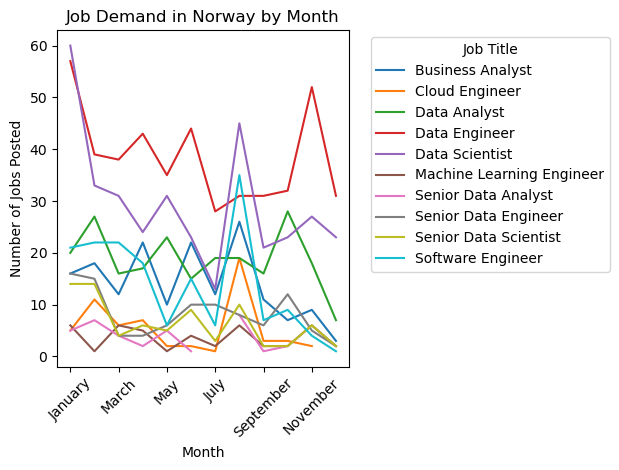

In [24]:
df_NO_pivot.plot(kind='line', )
plt.title('Job Demand in Norway by Month')
plt.xlabel('Month')
plt.ylabel('Number of Jobs Posted')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [31]:
top_3 = df_no['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

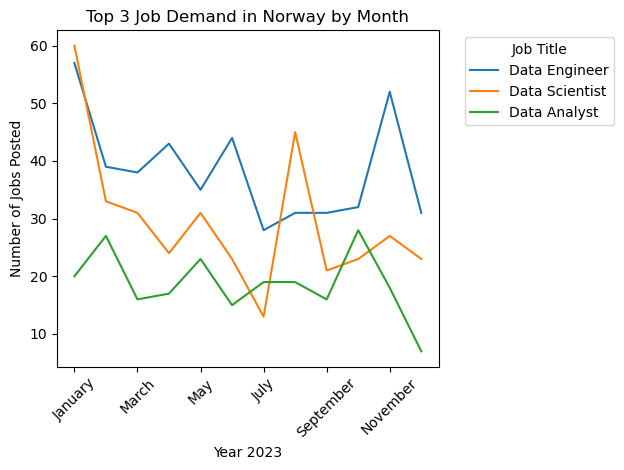

In [35]:
df_NO_pivot[top_3].plot(kind='line',)
plt.title('Top 3 Job Demand in Norway by Month')
plt.xlabel('Year 2023')
plt.ylabel('Number of Jobs Posted')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()